图表已保存为 'comparison_chart.png'


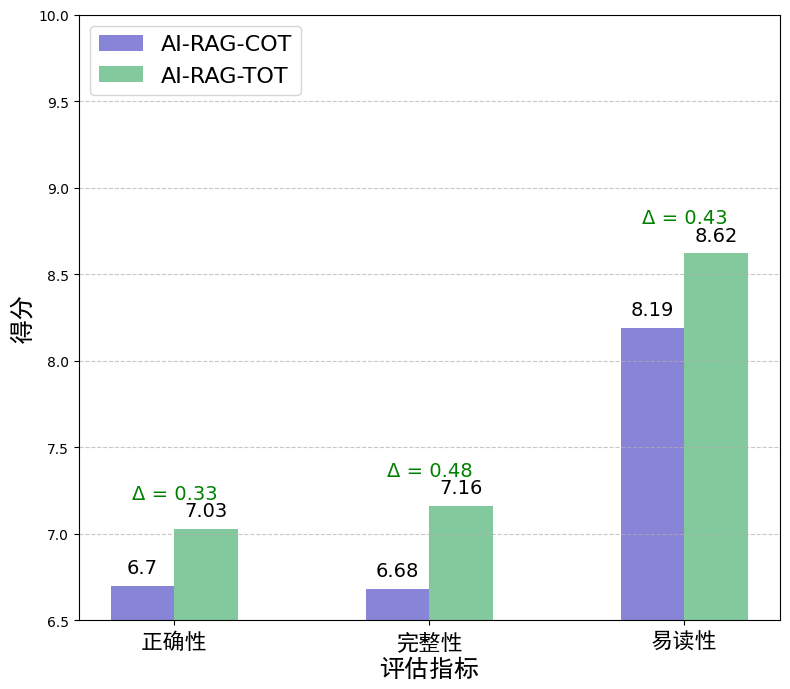

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import font_manager
import os
from pathlib import Path
import requests
import io

# 下载并嵌入开源中文字体
def embed_chinese_font():
    # 检查是否已有下载的字体
    font_path = Path("/data/veteran/project/TestPlanAgent/source/simhei.ttf")
    
    if not font_path.exists():
        try:
            # 下载开源中文字体（思源黑体）
            font_url = "https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SimplifiedChinese/SourceHanSansSC-Regular.otf"
            print("正在下载中文字体...")
            response = requests.get(font_url)
            
            # 保存字体文件
            with open(font_path, 'wb') as f:
                f.write(response.content)
            
            print(f"字体已下载到 {font_path}")
        except Exception as e:
            print(f"下载字体时出错: {e}")
            return None
    
    # 注册字体
    font_prop = font_manager.FontProperties(fname=str(font_path))
    return font_prop

def create_chart():
    # 嵌入中文字体
    font_prop = embed_chinese_font()
    
    # 数据
    metrics = ['正确性', '完整性', '易读性']
    ai_rag_cot = [6.70, 6.68, 8.19]
    ai_rag_tot = [7.03, 7.16, 8.62]

    # 设置图形大小
    plt.figure(figsize=(8, 7))

    # 设置柱状图的位置
    x = np.arange(len(metrics))
    width = 0.25

    # 绘制两组柱状图
    bars1 = plt.bar(x - width/2, ai_rag_cot, width, label='Chain of Thought (Iter-ReAct)-COT', color='#8884d8')
    bars2 = plt.bar(x + width/2, ai_rag_tot, width, label='Chain of Thought (Iter-ReAct)-TOT', color='#82ca9d')

    # 设置y轴范围，使差异更明显
    plt.ylim(6.5, 10)  # 从7开始以突出差异

    # 添加标题和标签，使用fontproperties参数直接指定字体
    if font_prop:
        # plt.title('Qwen2.5-coder-32B两种方案在各指标上的性能比较', fontproperties=font_prop, fontsize=15)
        plt.xlabel('评估指标', fontproperties=font_prop, fontsize=18)
        plt.ylabel('得分', fontproperties=font_prop, fontsize=18)
        plt.xticks(x, metrics, fontproperties=font_prop, fontsize=20)
    else:
        # 字体加载失败，使用英文
        plt.title('Performance Comparison of Two Methods (Qwen2.5-coder-32B)', fontsize=15)
        plt.xlabel('Metrics', fontsize=18)
        plt.ylabel('Score', fontsize=18)
        plt.xticks(x, ['Correctness', 'Completeness', 'Readability'], fontsize=16)

    # 在柱状图上添加数值标签
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height}', ha='center', va='bottom', fontsize=14)
                
    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height}', ha='center', va='bottom', fontsize=14)

    # 添加网格线使对比更清晰
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 为了更好地突出差异，添加差异标注
    for i in range(len(metrics)):
        diff = ai_rag_tot[i] - ai_rag_cot[i]
        color = 'green' if diff > 0 else 'red'
        plt.annotate(f'Δ = {diff:.2f}', 
                    xy=((x[i] - width/2 + x[i] + width/2)/2, max(ai_rag_cot[i], ai_rag_tot[i]) + 0.15),
                    ha='center', va='bottom', color=color, fontsize=14)

    # 添加图例
    plt.legend(fontsize=20, loc='upper left')

    # 调整布局
    plt.tight_layout()
    

    # 保存图片
    # plt.show()

    plt.savefig('comparison_chart.png', dpi=300)
    print("图表已保存为 'comparison_chart.png'")

create_chart()

图表已保存为 'comparison_chart.png'


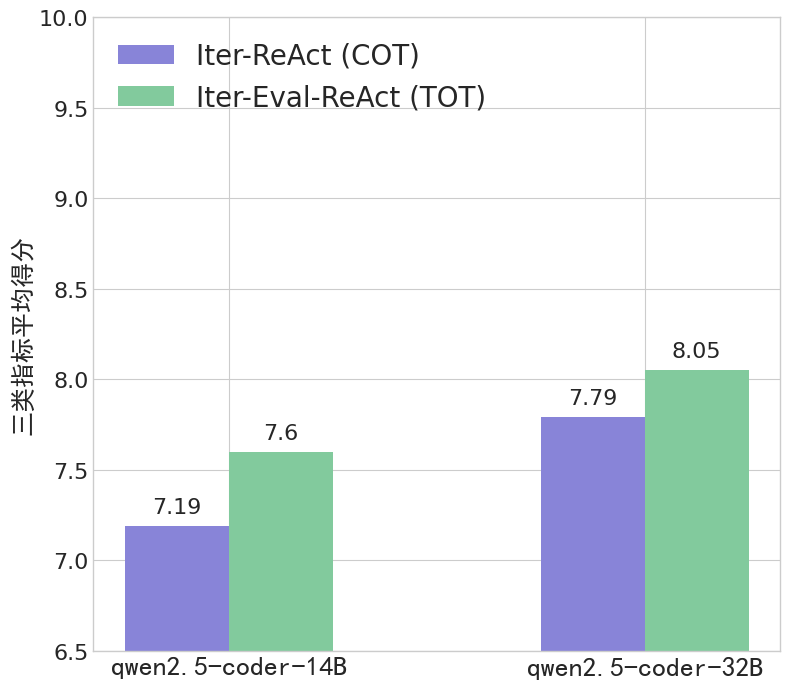

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import font_manager
import os
from pathlib import Path
import requests
import io

# 下载并嵌入开源中文字体
def embed_chinese_font():
    # 检查是否已有下载的字体
    font_path = Path("/data/veteran/project/TestPlanAgent/source/simhei.ttf")
    
    if not font_path.exists():
        try:
            # 下载开源中文字体（思源黑体）
            font_url = "https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SimplifiedChinese/SourceHanSansSC-Regular.otf"
            print("正在下载中文字体...")
            response = requests.get(font_url)
            
            # 保存字体文件
            with open(font_path, 'wb') as f:
                f.write(response.content)
            
            print(f"字体已下载到 {font_path}")
        except Exception as e:
            print(f"下载字体时出错: {e}")
            return None
    
    # 注册字体
    font_prop = font_manager.FontProperties(fname=str(font_path))
    return font_prop

def create_chart():
    # 嵌入中文字体
    font_prop = embed_chinese_font()
    
    # 数据
    metrics = ['qwen2.5-coder-14B', 'qwen2.5-coder-32B']
    ai_rag_cot = [7.19, 7.79]
    ai_rag_tot = [7.60, 8.05]

    # 设置图形大小
    plt.figure(figsize=(8, 7))

    # 设置柱状图的位置
    x = np.arange(len(metrics))
    width = 0.25

    # 绘制两组柱状图
    bars1 = plt.bar(x - width/2, ai_rag_cot, width, label='Iter-ReAct (COT)', color='#8884d8')
    bars2 = plt.bar(x + width/2, ai_rag_tot, width, label='Iter-Eval-ReAct (TOT)', color='#82ca9d')

    # 设置y轴范围，使差异更明显
    plt.ylim(6.5, 10)  # 从7开始以突出差异

    # 添加标题和标签，使用fontproperties参数直接指定字体
    if font_prop:
        # plt.title('Qwen2.5-coder-32B两种方案在各指标上的性能比较', fontproperties=font_prop, fontsize=15)
        # plt.xlabel('评估指标', fontproperties=font_prop, fontsize=18)
        plt.ylabel('三类指标平均得分', fontproperties=font_prop, fontsize=18)
        plt.yticks(fontsize=16)
        plt.xticks(x, metrics, fontproperties=font_prop, fontsize=20)

    # 在柱状图上添加数值标签
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height}', ha='center', va='bottom', fontsize=16)
                
    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height}', ha='center', va='bottom', fontsize=16)

    # 添加网格线使对比更清晰
    # plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 为了更好地突出差异，添加差异标注
    # for i in range(len(metrics)):
    #     diff = ai_rag_tot[i] - ai_rag_cot[i]
    #     color = 'green' if diff > 0 else 'red'
    #     plt.annotate(f'Δ = {diff:.2f}', 
    #                 xy=((x[i] - width/2 + x[i] + width/2)/2, max(ai_rag_cot[i], ai_rag_tot[i]) + 0.15),
    #                 ha='center', va='bottom', color=color, fontsize=16)

    # 添加图例
    plt.legend(fontsize=20, loc='upper left')

    # 调整布局
    plt.tight_layout()
    

    # 保存图片
    # plt.show()

    plt.savefig('comparison_chart.png', dpi=300)
    print("图表已保存为 'comparison_chart.png'")

create_chart()

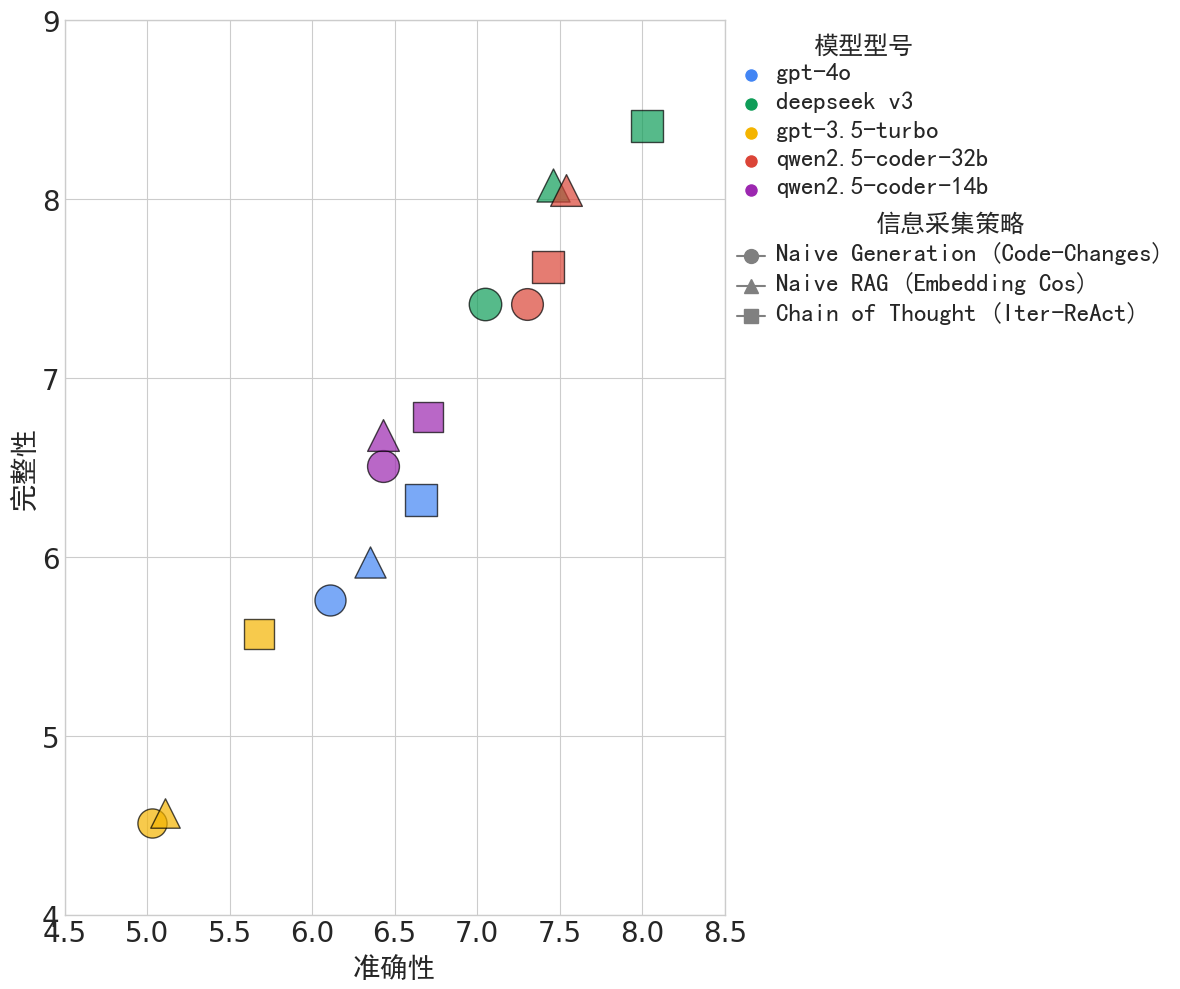

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

font_path = Path("/data/veteran/project/TestPlanAgent/source/simhei.ttf")
font_prop = font_manager.FontProperties(fname=str(font_path))
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('seaborn-v0_8-whitegrid')

# 构建数据
models = ["gpt-4o", "deepseek v3", "gpt-3.5-turbo", "qwen2.5-coder-32b", "qwen2.5-coder-14b"]
techniques = ["Naive Generation (Code-Changes)", "Naive RAG (Embedding Cos)", "Chain of Thought (Iter-ReAct)"]
metrics = ["accuracy", "completeness", "clarity"]

# 构建数据字典
data = {
    "gpt-4o": {
        "Naive Generation (Code-Changes)": {"accuracy": 6.11, "completeness": 5.76, "clarity": 8.32},
        "Naive RAG (Embedding Cos)": {"accuracy": 6.35, "completeness": 5.97, "clarity": 8.37},
        "Chain of Thought (Iter-ReAct)": {"accuracy": 6.66, "completeness": 6.32, "clarity": 8.61}
    },
    "deepseek v3": {
        "Naive Generation (Code-Changes)": {"accuracy": 7.05, "completeness": 7.41, "clarity": 9.11},
        "Naive RAG (Embedding Cos)": {"accuracy": 7.46, "completeness": 8.08, "clarity": 9.46},
        "Chain of Thought (Iter-ReAct)": {"accuracy": 8.03, "completeness": 8.41, "clarity": 9.16}
    },
    "gpt-3.5-turbo": {
        "Naive Generation (Code-Changes)": {"accuracy": 5.03, "completeness": 4.51, "clarity": 7.35},
        "Naive RAG (Embedding Cos)": {"accuracy": 5.11, "completeness": 4.57, "clarity": 7.49},
        "Chain of Thought (Iter-ReAct)": {"accuracy": 5.68, "completeness": 5.57, "clarity": 8.11}
    },
    "qwen2.5-coder-32b": {
        "Naive Generation (Code-Changes)": {"accuracy": 7.30, "completeness": 7.41, "clarity": 8.70},
        "Naive RAG (Embedding Cos)": {"accuracy": 7.54, "completeness": 8.05, "clarity": 8.70},
        "Chain of Thought (Iter-ReAct)": {"accuracy": 7.43, "completeness": 7.62, "clarity": 8.86}
    },
    "qwen2.5-coder-14b": {
        "Naive Generation (Code-Changes)": {"accuracy": 6.43, "completeness": 6.51, "clarity": 8.78},
        "Naive RAG (Embedding Cos)": {"accuracy": 6.43, "completeness": 6.68, "clarity": 8.70},
        "Chain of Thought (Iter-ReAct)": {"accuracy": 6.70, "completeness": 6.78, "clarity": 8.19}
    }
}

# 转换为DataFrame便于绘图
rows = []
for model in models:
    for tech in techniques:
        row = {
            'model': model,
            'technique': tech,
        }
        for metric in metrics:
            row[metric] = data[model][tech][metric]
        rows.append(row)

df = pd.DataFrame(rows)

# 绘制气泡图
def create_bubble_chart():
    plt.figure(figsize=(14, 10))
    
    # 为每个模型分配不同的颜色
    colors = {
        "gpt-4o": "#4285F4",
        "deepseek v3": "#0F9D58", 
        "gpt-3.5-turbo": "#F4B400",
        "qwen2.5-coder-32b": "#DB4437",
        "qwen2.5-coder-14b": "#9C27B0"
    }
    
    # 为每种技术分配不同的标记形状
    markers = {
        "Naive Generation (Code-Changes)": "o",        # 圆形
        "Naive RAG (Embedding Cos)": "^",          # 三角形
        "Chain of Thought (Iter-ReAct)": "s"     # 方形
    }
    
    # 创建图例句柄
    model_handles = []
    technique_handles = []
    
    # 绘制散点
    for model in models:
        for tech in techniques:
            x = df[(df['model'] == model) & (df['technique'] == tech)]['accuracy'].values[0]
            y = df[(df['model'] == model) & (df['technique'] == tech)]['completeness'].values[0]
            z = df[(df['model'] == model) & (df['technique'] == tech)]['clarity'].values[0]
            
            # 气泡大小与clarity成比例，但要调整比例确保可见性
            size = z * 60  # 将clarity值乘以一个因子以获得可见大小
            
            # 添加带标签的点
            plt.scatter(
                x, y, s=size, 
                color=colors[model], 
                marker=markers[tech],
                alpha=0.7,
                edgecolor='black', 
                linewidth=1
            )
    
    # 为每个点添加标签
    # for i, row in df.iterrows():
    #     plt.annotate(
    #         f"{row['model']}\n{row['technique']}", 
    #         xy=(row['accuracy'], row['completeness']),
    #         xytext=(5, 5),
    #         textcoords='offset points',
    #         fontsize=8
    #     )
    
    # 创建模型和技术的图例句柄和标签
    for model, color in colors.items():
        model_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=model))
    
    for tech, marker in markers.items():
        technique_handles.append(plt.Line2D([0], [0], marker=marker, color='gray', markersize=10, label=tech))
    
    # 添加参考线
    # plt.axhline(y=df['completeness'].mean(), color='gray', linestyle='--', alpha=0.3)
    # plt.axvline(x=df['accuracy'].mean(), color='gray', linestyle='--', alpha=0.3)
    
    # 添加说明文本
    # plt.figtext(0.02, 0.00, "注：气泡大小表示清晰度(clarity)", fontsize=16, ha='left', fontproperties=font_prop)
    
    # 设置图表属性
    # plt.title('模型性能比较: 准确性 vs 完整性 (气泡大小表示清晰度)', fontsize=100, fontproperties=font_prop)
    plt.xlabel('准确性', fontsize=20, fontproperties=font_prop)
    plt.ylabel('完整性', fontsize=20, fontproperties=font_prop)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # 设置轴范围并添加一点内边距
    plt.xlim(4.5, 8.5)
    plt.ylim(4.0, 9.0)
    
    # 添加网格线
    # plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加两个图例
    first_legend = plt.legend(handles=model_handles, 
                            title="模型型号", 
                            loc='upper left', 
                            bbox_to_anchor=(1, 1), 
                            title_fontproperties=font_prop,
                            prop=font_prop) 
    # 将第一个图例添加到图形中
    plt.gca().add_artist(first_legend)
    first_legend.get_title().set_fontsize(18) 

    # 设置图例项的字体大小
    for text in first_legend.get_texts():
        text.set_fontsize(18)  # 设置图例项文本的字体大小

    # 第二个图例 - 技术
    second_legend = plt.legend(handles=technique_handles, 
            title="信息采集策略", 
            loc='upper left', 
            bbox_to_anchor=(1, 0.8), 
            title_fontproperties=font_prop,
            prop=font_prop)  # 这里添加prop参数
    
    second_legend.get_title().set_fontsize(18) 

    for text in second_legend.get_texts():
        text.set_fontsize(18)  # 设置图例项文本的字体大小

    # 调整布局以适应图例
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    
    plt.savefig('model_performance_bubble_chart.png', dpi=300, bbox_inches='tight')
    plt.show()

# 执行绘图函数
create_bubble_chart()



findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

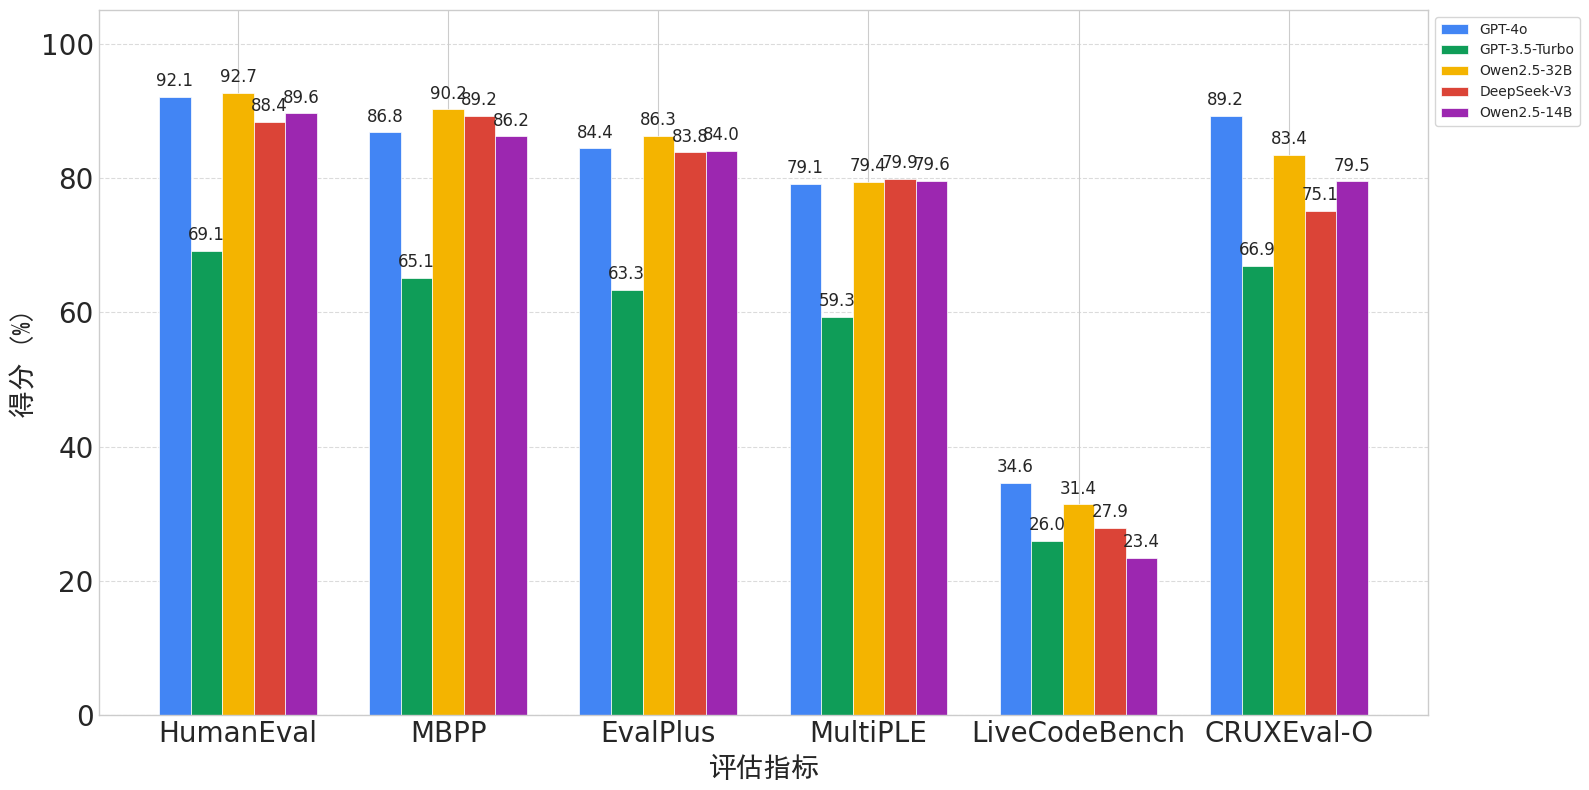

In [82]:
import numpy as np
import matplotlib.pyplot as plt

font_path = Path("/data/veteran/project/TestPlanAgent/source/simhei.ttf")
font_prop = font_manager.FontProperties(fname=str(font_path))
                                        
# 数据准备
models = ['GPT-4o', 'GPT-3.5-Turbo', 'Owen2.5-32B', 'DeepSeek-V3', 'Owen2.5-14B']
categories = ['HumanEval', 'MBPP', 'EvalPlus', 'MultiPLE', 'LiveCodeBench', 'CRUXEval-O']

# 原始数据 (GPT-3.5-Turbo按GPT-4o的75%估算)
data = np.array([
    [92.1, 86.8, 84.4, 79.1, 34.6, 89.2],    # GPT-4o
    [69.1, 65.1, 63.3, 59.3, 26.0, 66.9],     # GPT-3.5-Turbo
    [92.7, 90.2, 86.3, 79.4, 31.4, 83.4],     # Owen2.5-32B
    [88.4, 89.2, 83.8, 79.9, 27.9, 75.1],     # DeepSeek-V3
    [89.6, 86.2, 84.0, 79.6, 23.4, 79.5]      # Owen2.5-14B
])

# 创建画布
fig, ax = plt.subplots(figsize=(16, 8))

# 设置柱状图参数
bar_width = 0.15
x_indices = np.arange(len(categories))
colors = ['#4285F4', '#0F9D58', '#F4B400', '#DB4437', '#9C27B0']

# 绘制每组柱状图
for i, model in enumerate(models):
    offset = (i - len(models)/2) * bar_width + bar_width/2
    bars = ax.bar(x_indices + offset, data[i], bar_width, color=colors[i], label=model, edgecolor='white', linewidth=0.5)
    
    # 在柱子上方添加数值标签
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height+1,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=12)
plt.yticks(fontsize=20)
# 优化图表细节

ax.set_xlabel('评估指标', fontsize=20, fontproperties=font_prop)
ax.set_ylabel('得分 (%)', fontsize=20, fontproperties=font_prop)
ax.set_xticks(x_indices)

ax.set_xticklabels(categories, fontsize=20)
ax.set_ylim(0, 105)  # 留出空间显示顶部标签

# 添加横向网格线
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# 添加图例和注释
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
# plt.figtext(0.5, 0.01, 
#            '注: GPT-3.5-Turbo数据为基于GPT-4o的75%估算值 | LiveCodeBench指标普遍较低', 
#            ha='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

In [ ]:
def create_faceted_bubble_chart():
    # 为每个技术创建一个子图
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
    
    # 为每个模型分配不同的颜色
    colors = {
        "gpt-4o": "#4285F4",
        "deepseek v3": "#0F9D58", 
        "gpt-3.5-turbo": "#F4B400",
        "qwen2.5-coder-ins 32b": "#DB4437",
        "qwen2.5-coder-ins 14b": "#9C27B0"
    }
    
    for i, tech in enumerate(techniques):
        ax = axes[i]
        
        # 筛选当前技术的数据
        tech_data = df[df['technique'] == tech]
        
        # 绘制散点
        for model in models:
            model_data = tech_data[tech_data['model'] == model]
            x = model_data['accuracy'].values[0]
            y = model_data['completeness'].values[0]
            z = model_data['clarity'].values[0]
            
            # 气泡大小与clarity成比例
            size = z * 100
            
            # 添加带标签的点
            scatter = ax.scatter(
                x, y, s=size, 
                color=colors[model], 
                alpha=0.7,
                edgecolor='black', 
                linewidth=1,
                label=model
            )
            
            # 添加标签
            ax.annotate(
                f"{model}\n{z:.2f}", 
                xy=(x, y),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=8
            )
        
        # 设置子图标题和标签
        ax.set_title(f'技术: {tech}', fontsize=12, fontproperties=font_prop)
        
        # 添加网格线
        ax.grid(True, linestyle='--', alpha=0.5)
        
        # 设置轴范围
        ax.set_xlim(4.5, 8.5)
        ax.set_ylim(4.0, 9.0)
        
        # 只在第一个子图上添加y轴标签
        if i == 0:
            ax.set_ylabel('完整性 (Completeness)', fontsize=12, fontproperties=font_prop)
        
        # 添加x轴标签
        ax.set_xlabel('准确率 (Accuracy)', fontsize=12, fontproperties=font_prop)
    
    # 添加整体标题
    fig.suptitle('不同技术下的模型性能比较 (气泡大小表示清晰度)', fontsize=16, fontproperties=font_prop)
    
    # 添加全局图例
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="模型", loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=5, prop=font_prop)
    
    # 调整布局
    fig.tight_layout(rect=[0, 0.1, 1, 0.95])
    
    plt.savefig('model_performance_faceted_bubble_chart.png', dpi=300, bbox_inches='tight')
    plt.show()
